In [38]:
import time
import math
import matplotlib.pyplot as plt
from fractions import Fraction
from itertools import combinations

In [39]:
# ==============================================================================
# Fungsi Greedy (tidak berubah, digunakan sebagai helper)
# ==============================================================================
def greedy_egyptian_benchmark(p, q):
    """
    Versi benchmark dari algoritma Greedy.
    Mengembalikan list penyebut untuk diolah lebih lanjut.
    """
    # Menggunakan objek Fraction untuk penanganan pecahan yang lebih aman.
    frac = Fraction(p, q)
    denominators = []

    while frac.numerator != 0:
        # math.ceil(1 / frac) secara otomatis menghitung penyebut berikutnya.
        x = math.ceil(1 / frac)
        denominators.append(x)
        # Kurangi pecahan dengan 1/x untuk iterasi selanjutnya.
        frac -= Fraction(1, x)

    return denominators

In [40]:
# ==============================================================================
# MESIN BRUTE FORCE BARU: The Small Multiple Method
# ==============================================================================
def _esm_find_combination(x, y):
    """
    Fungsi inti brute-force. Mencari kombinasi 'ajaib'.
    'esm' adalah singkatan dari Egypt Small Multiple.
    """
    # Mulai dengan mencari kombinasi dari {1/1, 1/2, ...}
    i = 1
    while True:
        # Siapkan 'amunisi': [Fraction(1,1), Fraction(1,2), ..., Fraction(1,i)]
        candidate_fractions = [Fraction(1, j) for j in range(1, i + 1)]

        # Coba semua panjang kombinasi (dari 1 sampai i)
        for k in range(1, i + 1):
            # Hasilkan semua subset dengan panjang k
            for subset in combinations(candidate_fractions, k):
                # Jumlahkan pecahan dalam subset
                current_sum = sum(subset)

                # PERBAIKAN 1: Pastikan kombinasi tidak lebih besar dari pecahan asli
                # untuk menghindari sisa negatif.
                if current_sum > Fraction(x,y):
                    continue

                a = current_sum.numerator
                b = current_sum.denominator

                # UJI AJAIB: Apakah kombinasi ini "membatalkan" faktor y?
                if (x * b - a) % y == 0:
                    # Jika ya, kita temukan kombinasi ajaib!
                    print(f"  > Ditemukan kombinasi ajaib setelah menguji {i} suku: {list(subset)}")
                    # Kembalikan list dari pecahan itu sendiri, bukan hanya jumlahnya.
                    return list(subset)

        # Jika tidak ada kombinasi yang ditemukan, tambah 'amunisi' dan coba lagi.
        i += 1
        # Pengaman darurat agar tidak berjalan selamanya pada kasus yang sangat sulit
        if i > 20:
             print("  > Batas pencarian kombinasi tercapai (i > 20).")
             return None


def brute_force_small_multiple(x, y):
    """
    Fungsi pembungkus yang mengimplementasikan logika Small Multiple Method.
    Ini adalah fungsi yang akan kita benchmark.
    """
    print("Menjalankan Brute Force (Small Multiple Method)...")

    # Langkah 1: Cari list kombinasi 'ajaib' (C) menggunakan brute force.
    magic_combination_list = _esm_find_combination(x, y)

    if magic_combination_list is None:
        return ["Gagal menemukan kombinasi"]

    # PERBAIKAN 2: Hitung jumlahnya di sini.
    magic_combination_sum = sum(magic_combination_list)

    # Langkah 2: Hitung "sisa" pecahannya: x/y - C
    remainder_frac = Fraction(x, y) - magic_combination_sum

    # Langkah 3: Gunakan algoritma Greedy yang cepat untuk menyelesaikan sisanya.
    remainder_denoms = greedy_egyptian_benchmark(remainder_frac.numerator, remainder_frac.denominator)

    # PERBAIKAN 3: Logika yang benar untuk menggabungkan hasil.
    # Bagian pertama adalah penyebut dari setiap pecahan di kombinasi ajaib, dikalikan dengan y.
    final_denominators = {frac.denominator * y for frac in magic_combination_list}

    # Tambahkan penyebut dari bagian sisa.
    final_denominators.update(remainder_denoms)

    return sorted(list(final_denominators))

Memulai benchmark untuk pecahan: 4/13

Menjalankan Greedy...
Hasil Greedy: 1/4 + 1/18 + 1/468
Waktu eksekusi Greedy: 0.0001639000 detik

Menjalankan Brute Force (Small Multiple Method)...
  > Ditemukan kombinasi ajaib setelah menguji 10 suku: [Fraction(1, 10)]
Hasil Brute Force (Small Multiple): 1/5 + 1/130
Waktu eksekusi Brute Force: 0.0032833000 detik

Membuat visualisasi grafik...


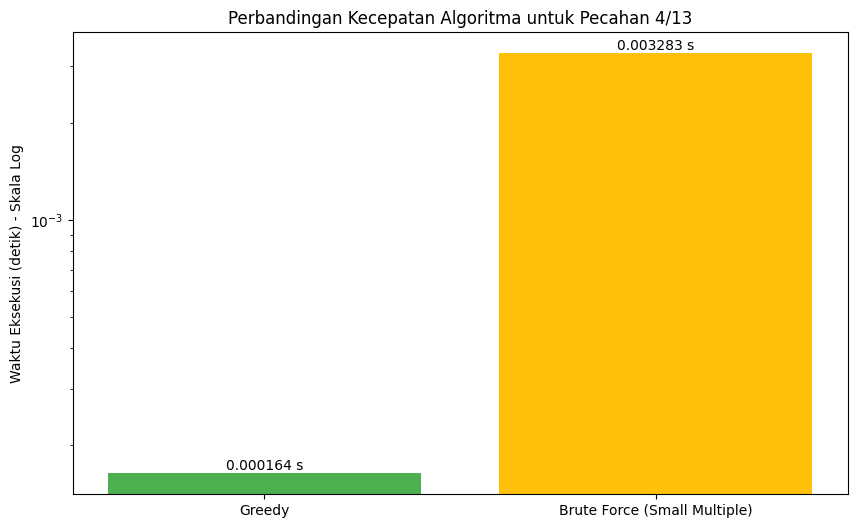

In [41]:
# ==============================================================================
# SKRIP UTAMA UNTUK BENCHMARK DAN PLOT
# ==============================================================================

# Pecahan yang akan diuji. Coba ubah-ubah nilai ini!
# 4/13 adalah contoh yang sangat baik untuk metode ini karena 13 adalah bilangan prima.
pembilang = 4
penyebut = 13

print(f"Memulai benchmark untuk pecahan: {pembilang}/{penyebut}\n")

# --- Benchmark Algoritma Greedy ---
print("Menjalankan Greedy...")
start_time_greedy = time.perf_counter()
result_greedy = greedy_egyptian_benchmark(pembilang, penyebut)
end_time_greedy = time.perf_counter()
time_greedy = end_time_greedy - start_time_greedy
print(f"Hasil Greedy: 1/{' + 1/'.join(map(str, result_greedy))}")
print(f"Waktu eksekusi Greedy: {time_greedy:.10f} detik\n")


# --- Benchmark Algoritma Brute Force BARU ---
# Kita ganti pemanggilan fungsi brute_force lama dengan yang baru.
start_time_bf = time.perf_counter()
result_bf = brute_force_small_multiple(pembilang, penyebut)
end_time_bf = time.perf_counter()
time_bf = end_time_bf - start_time_bf

if result_bf and isinstance(result_bf[0], int):
    print(f"Hasil Brute Force (Small Multiple): 1/{' + 1/'.join(map(str, result_bf))}")
else:
    print("Brute force gagal menemukan solusi.")
print(f"Waktu eksekusi Brute Force: {time_bf:.10f} detik\n")


# --- Membuat Plot Grafik ---
print("Membuat visualisasi grafik...")

algorithms = ['Greedy', 'Brute Force (Small Multiple)']
times = [time_greedy, time_bf]

plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, times, color=['#4CAF50', '#FFC107'])

plt.ylabel('Waktu Eksekusi (detik)')
plt.title(f'Perbandingan Kecepatan Algoritma untuk Pecahan {pembilang}/{penyebut}')
plt.yscale('log')
plt.ylabel('Waktu Eksekusi (detik) - Skala Log')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.6f} s', va='bottom', ha='center')

plt.show()
